In [1]:
from google.colab import files

In [ ]:
files.upload()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv('cardio_train.csv',sep=';')

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


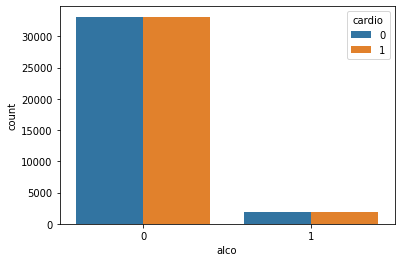

In [6]:
sns.countplot(x='alco',hue='cardio',data=df)

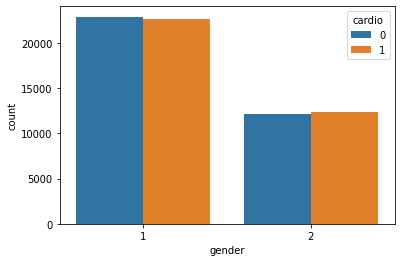

In [7]:
sns.countplot(x='gender',hue='cardio',data=df)

In [8]:
card=df[df.cardio==1].shape[0]

In [9]:
sum_val=sum(df['cardio'].value_counts())

In [10]:
card_per=(card/sum_val)*100

In [11]:
card_per

49.97

In [12]:
x=df.drop(['cardio'],axis=1)

In [13]:
y=df['cardio']

In [14]:
feature=SelectKBest()

In [15]:
feature.fit(x,y)

SelectKBest(k=10, score_func=<function f_classif at 0x7ffa18aa3c20>)

In [16]:
pd.Series(feature.scores_,index=x.columns)

id                1.010461
age            4209.007957
gender            4.603641
height            8.197397
weight         2388.777887
ap_hi           208.339524
ap_lo           303.629011
cholesterol    3599.361137
gluc            562.772977
smoke            16.790541
alco              3.761355
active           89.091494
dtype: float64

In [17]:
topper=list(pd.Series(feature.scores_,index=x.columns).nlargest(8).keys())
topper

['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'active', 'smoke']

In [18]:
x=df[topper]

In [19]:
y=df['cardio']

In [20]:
Extra=ExtraTreesClassifier(n_estimators=5)

In [21]:
Scaler=MinMaxScaler(feature_range=(1,5))

In [22]:
Scaled_x=Scaler.fit_transform(x)

In [23]:
Extra.fit(Scaled_x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

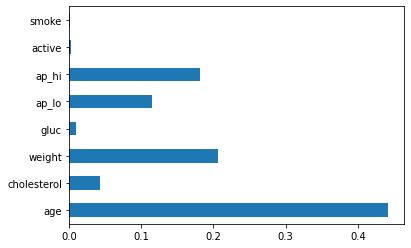

In [24]:
pd.Series(Extra.feature_importances_,index=x.columns).plot(kind='barh')

In [25]:
Forest=RandomForestClassifier(n_estimators=5)
Tree=DecisionTreeClassifier()
Logi=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=650)
Support=SVC(gamma='auto')
GNB=GaussianNB()
BNB=BernoulliNB()
MNB=MultinomialNB()

In [26]:
tools=[Extra,Forest,Tree,Logi,KNN,Support,GNB,BNB,MNB]

In [27]:
lis=[]
for i in tools:
  cv_score=cross_val_score(i,Scaled_x,y,cv=3)
  lis.append(cv_score.mean())

In [28]:
K=tools[lis.index(max(lis))]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [30]:
K.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
K.score(xtest,ytest)

0.6759285714285714

In [32]:
pred=K.predict(xtest)

In [33]:
confusion_matrix(ytest,pred)

array([[4630, 2287],
       [2250, 4833]])

In [34]:
accept=pd.DataFrame(K.predict_proba(xtest))

In [35]:
acp=[]
for i in K.predict_proba(xtest):
  i=list(i)
  acp.append(i.index(max(i)))

In [36]:
accept['Accepted']=acp

In [37]:
accept

,0,1,Accepted
0,0.0,1.0,1
1,1.0,0.0,0
2,0.2,0.8,1
3,0.6,0.4,0
4,0.0,1.0,1
...,...,...,...
13995,0.4,0.6,1
13996,1.0,0.0,0
13997,0.6,0.4,0
13998,1.0,0.0,0


In [38]:
a=[21*365,1,80,1,80,120,1,0]

In [39]:
a=Scaler.transform([a])

In [40]:
K.predict(a)

array([0])

In [41]:
pd.DataFrame(K.predict_proba(a))

,0,1
0,0.8,0.2
